In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
feature_df = pd.read_csv("feature_df.csv")

In [4]:
print(feature_df.head())

    ch0_rms   ch0_mav  ch0_zc    ch0_wl   ch1_rms   ch1_mav  ch1_zc    ch1_wl  \
0  0.000015  0.000010    1772  0.055632  0.000011  0.000006    1592  0.026989   
1  0.000019  0.000012    1653  0.069478  0.000013  0.000008    1535  0.032043   
2  0.000015  0.000010    1680  0.055879  0.000013  0.000008    1523  0.033162   
3  0.000015  0.000009    1789  0.053372  0.000010  0.000006    1638  0.027245   
4  0.000013  0.000009    1804  0.049478  0.000009  0.000006    1564  0.026082   

    ch2_rms   ch2_mav  ...    ch9_wl  ch10_rms  ch10_mav  ch10_zc   ch10_wl  \
0  0.000005  0.000003  ...  0.205765  0.000010  0.000007     1181  0.022307   
1  0.000005  0.000004  ...  0.186407  0.000011  0.000008     1004  0.023776   
2  0.000005  0.000004  ...  0.166222  0.000012  0.000009      923  0.022858   
3  0.000004  0.000003  ...  0.131930  0.000010  0.000007     1062  0.021450   
4  0.000005  0.000004  ...  0.104352  0.000011  0.000008      959  0.021418   

   ch11_rms  ch11_mav  ch11_zc   ch11_

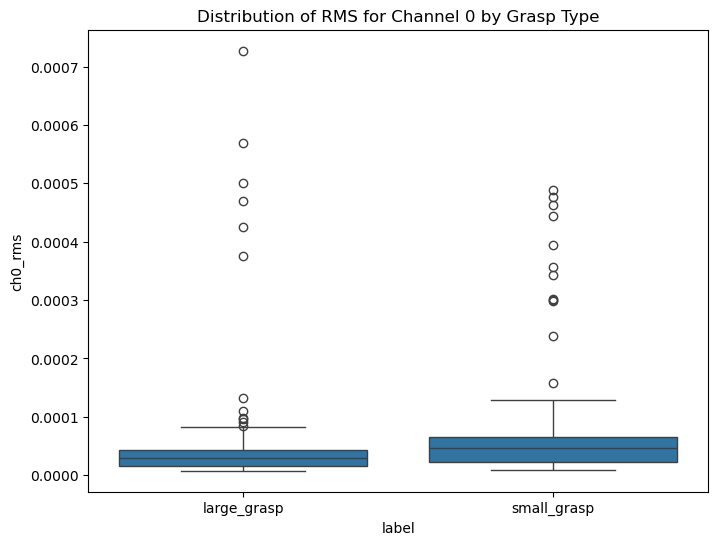

In [10]:
# Create a box plot for the RMS of channel 0
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='ch0_rms', data=feature_df)
plt.title('Distribution of RMS for Channel 0 by Grasp Type')
plt.show()

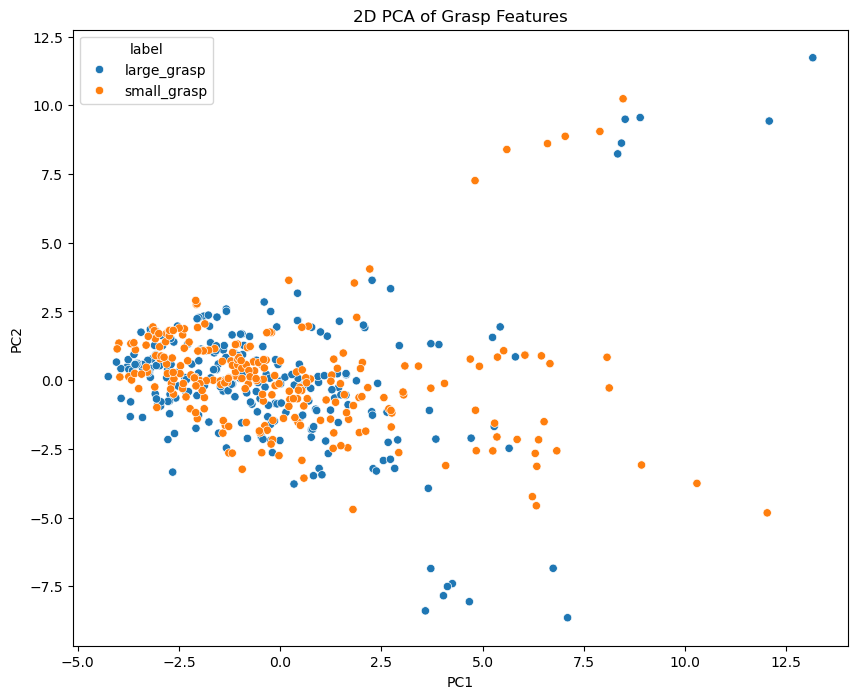

In [12]:
# Separate features (X) from labels (y)
X = feature_df.drop('label', axis=1)
y = feature_df['label']

# Scale the features (important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df)
plt.title('2D PCA of Grasp Features')
plt.show()

In [14]:
# Load data and separate features from labels
feature_df = pd.read_csv('feature_df.csv')
X = feature_df.drop('label', axis=1)
y = feature_df['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 87.50%

Classification Report:
              precision    recall  f1-score   support

 large_grasp       0.93      0.81      0.86        47
 small_grasp       0.84      0.94      0.88        49

    accuracy                           0.88        96
   macro avg       0.88      0.87      0.87        96
weighted avg       0.88      0.88      0.87        96



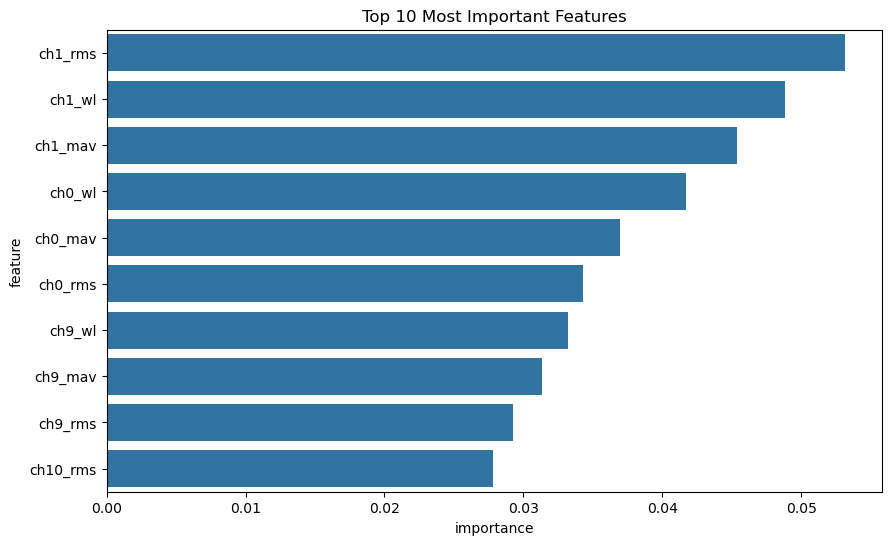

In [15]:
# (Run this after training the model from the step above)

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe of features and their importance scores
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance and get the top 10
top_10_features = importance_df.sort_values(by='importance', ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_10_features)
plt.title('Top 10 Most Important Features')
plt.show()